In [1]:
#核心代码来自微信号gh_30599cd767ee，野生交易员的试炼之路。
import pandas as pd
datename = '180101To220825'
pricefilename = '{}{}{}'.format('data/price_',datename,'.pkl')
premfilename = '{}{}{}'.format('data/prem_',datename,'.pkl')
sizefilename = '{}{}{}'.format('data/size_',datename,'.pkl')
day_returnfilename = '{}{}{}'.format('data/day_return_',datename,'.pkl')
price100filename = '{}{}{}'.format('data/price100_',datename,'.pkl')
prem100filename = '{}{}{}'.format('data/prem100_',datename,'.pkl')
size100filename = '{}{}{}'.format('data/size100_',datename,'.pkl')
priceRankfilename = '{}{}{}'.format('data/priceRank_',datename,'.pkl')
premRankfilename = '{}{}{}'.format('data/premRank_',datename,'.pkl')
sizeRankfilename = '{}{}{}'.format('data/sizeRank_',datename,'.pkl')

pricedf=pd.read_pickle(pricefilename)  #读取收盘价矩阵
premdf=pd.read_pickle(premfilename)    #读取溢价率矩阵。
sizedf=pd.read_pickle(sizefilename)    #读取余额矩阵。
day_return=pd.read_pickle(day_returnfilename)  #读取收益率矩阵
price100df=pd.read_pickle(price100filename)  #读取收盘价百分数矩阵
prem100df=pd.read_pickle(prem100filename)    #读取溢价率百分数矩阵。
size100df=pd.read_pickle(size100filename)    #读取余额百分数矩阵。
priceRankdf=pd.read_pickle(priceRankfilename)  #读取收盘价排名矩阵
premRankdf=pd.read_pickle(premRankfilename)    #读取溢价率排名矩阵。
sizeRankdf=pd.read_pickle(sizeRankfilename)    #读取余额排名矩阵。

In [2]:
factor=premdf+pricedf  #传统双低策略。
factor

tickerBond,110030,110031,110032,110033,110034,110038,110039,110040,110041,110042,...,128136,128137,128138,128139,128140,128141,128142,128143,128144,128145
tradeDate,,,,,,,,,,,,,,,,,,,,,
2018-01-02,137.6523,197.9584,125.8948,119.9688,116.4166,122.7941,112.6824,116.1799,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,137.3305,196.7959,127.5878,123.5641,121.2046,123.0295,115.3602,119.0198,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,137.4179,197.0953,127.0837,124.2720,123.2229,125.2312,117.7899,119.0784,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,138.0589,199.6603,130.9679,127.3469,123.9625,128.1535,120.4825,121.1674,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,136.5004,202.3870,131.8454,127.5010,125.0212,127.4136,121.1056,121.2201,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-19,NaN,NaN,NaN,NaN,NaN,151.6084,NaN,NaN,NaN,NaN,...,200.2033,169.6563,258.3007,300.3896,194.6706,162.2221,204.2505,175.8514,163.2978,163.6103
2022-08-22,NaN,NaN,NaN,NaN,NaN,151.3247,NaN,NaN,NaN,NaN,...,197.4995,173.7347,263.9786,NaN,194.3421,168.6923,204.8625,178.0754,160.6373,163.6897
2022-08-23,NaN,NaN,NaN,NaN,NaN,151.6808,NaN,NaN,NaN,NaN,...,197.2530,178.5138,265.4574,NaN,189.4948,160.1751,204.8393,181.2435,157.2799,162.8647


In [3]:
N=10
def selectTopN(tmp):
    tmp=tmp.copy()
    symbols=tmp.nsmallest(N).index
    tmp[:]=0
    tmp[symbols]=1
    return tmp
signal=factor.apply(selectTopN,axis=1)

In [4]:
pnl=(signal*day_return).sum(axis=1)/N
pnl

tradeDate
2018-01-02    0.005807
2018-01-03    0.013516
2018-01-04    0.011145
2018-01-05    0.002149
2018-01-08   -0.008302
                ...   
2022-08-19    0.003206
2022-08-22    0.002233
2022-08-23   -0.010391
2022-08-24   -0.012127
2022-08-25    0.000000
Length: 1130, dtype: float64

In [5]:
pnl['2018-01']

tradeDate
2018-01-02    0.005807
2018-01-03    0.013516
2018-01-04    0.011145
2018-01-05    0.002149
2018-01-08   -0.008302
2018-01-09   -0.009587
2018-01-10    0.001331
2018-01-11   -0.000406
2018-01-12   -0.015418
2018-01-15   -0.000723
2018-01-16    0.001409
2018-01-17    0.005174
2018-01-18    0.004222
2018-01-19    0.012730
2018-01-22    0.006284
2018-01-23    0.010537
2018-01-24    0.014380
2018-01-25   -0.005426
2018-01-26   -0.013588
2018-01-29   -0.002167
2018-01-30   -0.008018
2018-01-31   -0.012219
dtype: float64

<AxesSubplot:xlabel='tradeDate'>

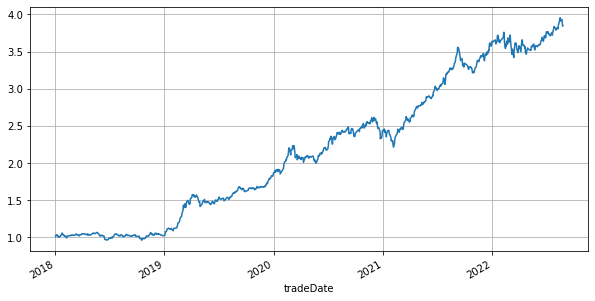

In [6]:
(pnl+1).cumprod().plot(figsize=(10,5),grid=True)

In [7]:
#常见的评估指标包括：总收益率、年化收益率、最大回撤率、夏普率、卡玛率。
maxdd = lambda pnl: (1-(1+pnl).cumprod()/(1+pnl).cumprod().expanding().max()).max()
sharpe=lambda pnl:(pnl.mean() / pnl.std()) * (243**0.5)
gain_total=lambda pnl:(1+pnl).prod()-1
gain_yearly=lambda pnl:(1+pnl).prod()**(243/len(pnl))-1
calmar=lambda pnl:gain_yearly(pnl)/maxdd(pnl)

l=[]
d={ '总收益':gain_total(pnl),
    '年化收益':gain_yearly(pnl),
    '最大回撤':maxdd(pnl),
    '夏普率':sharpe(pnl),
    '卡玛率':calmar(pnl),
    '2018收益':gain_total(pnl['2018']),
    '2019收益':gain_total(pnl['2019']),
    '2020收益':gain_total(pnl['2020']),   
    '2021收益':gain_total(pnl['2021']),
    '2022收益':gain_total(pnl['2022']),
    '2022最大回撤':maxdd(pnl['2022']),}
l.append(d)
result=pd.DataFrame(l)
result

,总收益,年化收益,最大回撤,夏普率,卡玛率,2018收益,2019收益,2020收益,2021收益,2022收益,2022最大回撤
0,2.845271,0.335935,0.152968,2.080041,2.196117,0.018197,0.822924,0.314887,0.491144,0.05662,0.090916


<AxesSubplot:xlabel='tradeDate'>

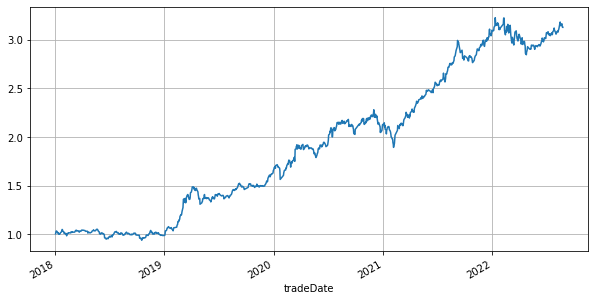

In [8]:
#调仓频率由每天改为5天。
tmpdf=signal.iloc[range(0,len(signal),5)]
week_selected_df=pd.DataFrame(index=signal.index)
week_selected_df=week_selected_df.join(tmpdf)
week_selected_df=week_selected_df.fillna(method='pad')

pnl=(week_selected_df*day_return).sum(axis=1)/N
(pnl+1).cumprod().plot(figsize=(10,5),grid=True)

In [9]:
l=[]
d={ '总收益':gain_total(pnl),
    '年化收益':gain_yearly(pnl),
    '最大回撤':maxdd(pnl),
    '夏普率':sharpe(pnl),
    '卡玛率':calmar(pnl),
    '2018收益':gain_total(pnl['2018']),
    '2019收益':gain_total(pnl['2019']),
    '2020收益':gain_total(pnl['2020']),   
    '2021收益':gain_total(pnl['2021']),
    '2022收益':gain_total(pnl['2022']),
    '2022最大回撤':maxdd(pnl['2022']),}
l.append(d)
result=pd.DataFrame(l)
result

,总收益,年化收益,最大回撤,夏普率,卡玛率,2018收益,2019收益,2020收益,2021收益,2022收益,2022最大回撤
0,2.124909,0.27765,0.169393,1.75666,1.639091,-0.012513,0.67558,0.286443,0.454297,0.009479,0.117853
